In [415]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

key: 
df0 - 370
df1 - 372
df2 - 373
df3 - 374
df4 - 375
df5 - 376
df99 - All stores 

working ideas to run all the cleaning at once for scalability 

In [416]:
# 370 = pd.read_excel (r'370.xlsx',header=[3])
# 272 = pd.read_excel (r'372.xlsx',header=[3])
# 373 = pd.read_excel (r'373.xlsx',header=[3])
# 374 = pd.read_excel (r'374.xlsx',header=[3])
# 375 = pd.read_excel (r'375.xlsx',header=[3])
# 376 = pd.read_excel (r'376.xlsx',header=[3])


# stores = [370, 372, 373, 374, 375, 376]


# ys = {
# df0.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
# df0.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty'}, inplace=True)
# df0 = df0[df0.Customer != "TRANSFERS TO #372 J'VILLE"]
# df0 = df0[df0.Customer != "TRANSFERS TO #374 SEYMOUR"]
# df0 = df0[df0.Customer != "TRANSFERS TO #373 E-TOWN"]
# df0 = df0[df0.Customer != "TRANSFERS TO #375 S'VILLE"]
# df0 = df0[df0.Customer != "*** STORE TRANSFERS ***"]
# df0 = df0[df0.Customer != "Beginning Balance"]
# df0 = df0[df0.Customer != 'Net Activity']
# df0 = df0[df0.Customer != 'Ending Balance']
# df0 = df0[df0.Customer != 'VOID']
# df0 = df0.dropna(how="all")
# Gross = df0.Qty * df0.Price
# df0['Gross'] = Gross.where(df0.Price == 'Qty', other=Gross)
# Net = df0.Qty * df0.Cost 
# df0['Net'] = Net.where(df0.Cost == 'Qty', other=Net)
# Net = df0.Gross - df0.Net 
# df0['Net'] = Net.where(df0.Gross == "Net", other=Net)
#     }

# for store in stores:
#     for df0 in ys:
        

In [417]:
df0 = pd.read_excel (r'370.xlsx',header=[3])
df0.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df0.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty'}, inplace=True)
df0 = df0[df0.Customer != "TRANSFERS TO #372 J'VILLE"]
df0 = df0[df0.Customer != "TRANSFERS TO #374 SEYMOUR"]
df0 = df0[df0.Customer != "TRANSFERS TO #373 E-TOWN"]
df0 = df0[df0.Customer != "TRANSFERS TO #375 S'VILLE"]
df0 = df0[df0.Customer != "*** STORE TRANSFERS ***"]
df0 = df0[df0.Customer != "Beginning Balance"]
df0 = df0[df0.Customer != 'Net Activity']
df0 = df0[df0.Customer != 'Ending Balance']
df0 = df0[df0.Customer != 'VOID']
df0 = df0.dropna(how="all")

Gross = df0.Qty * df0.Price
df0['Gross'] = Gross.where(df0.Price == 'Qty', other=Gross)

Net = df0.Qty * df0.Cost 
df0['Net'] = Net.where(df0.Cost == 'Qty', other=Net)

Net = df0.Gross - df0.Net 
df0['Net'] = Net.where(df0.Gross == "Net", other=Net)

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [418]:
df0.head()

,Transaction Date,Customer,Qty,Price,Cost,Gross,Net


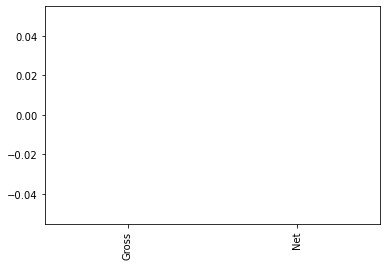

Total Gross: 0.0
Total Net: 0.0


In [419]:
Net_Gross270 = {
    'Gross' : df0['Gross'].sum(),
    'Net' : df0['Net'].sum()
}


data = Net_Gross270
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df0['Gross'].sum()
Total_net = df0['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))

In [420]:
df1 = pd.read_excel (r'372.xlsx',header=[3])
df1.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df1.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty'}, inplace=True)
df1 = df1[df1.Customer != "TRANSFERS TO #372 J'VILLE"]
df1 = df1[df1.Customer != "TRANSFERS TO #374 SEYMOUR"]
df1 = df1[df1.Customer != "TRANSFERS TO #373 E-TOWN"]
df1 = df1[df1.Customer != "TRANSFERS TO #375 S'VILLE"]
df1 = df1[df1.Customer != "*** STORE TRANSFERS ***"]
df1 = df1[df1.Customer != "Beginning Balance"]
df1 = df1[df1.Customer != 'Net Activity']
df1 = df1[df1.Customer != 'Ending Balance']
df1 = df1[df1.Customer != 'VOID']
df1 = df1.dropna(how="all")

Gross = df1.Qty * df1.Price
df1['Gross'] = Gross.where(df1.Price == 'Qty', other=Gross)

Net = df1.Qty * df1.Cost 
df1['Net'] = Net.where(df1.Cost == 'Qty', other=Net)

Net = df1.Gross - df1.Net 
df1['Net'] = Net.where(df1.Gross == "Net", other=Net)


/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [421]:
df1.head()

,Transaction Date,Customer,Qty,Price,Cost,Gross,Net
1,2022-10-31,"GOTTA GO, INC. - TRACKING",1.0,75.0,50.0,75.0,25.0
8,2022-10-12,ERNST CONCRETE KENTUCKIAN,8.0,80.0,50.0,640.0,240.0
10,2022-10-06,"GOTTA GO, INC.",2.0,75.0,50.0,150.0,50.0
18,2022-09-22,"GOTTA GO, INC.",2.0,75.0,50.0,150.0,50.0
19,2022-09-20,"GOTTA GO, INC. - TRACKING",1.0,75.0,50.0,75.0,25.0


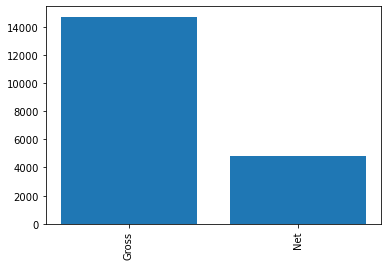

Total Gross: 14745.0
Total Net: 4845.0


In [422]:
Net_Gross272 = {
    'Gross' : df1['Gross'].sum(),
    'Net' : df1['Net'].sum()
}


data = Net_Gross272
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df1['Gross'].sum()
Total_net = df1['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))

In [423]:
df2 = pd.read_excel (r'373.xlsx',header=[3])
df2.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df2.rename(columns={'Customer/Vendor Name' : 'Customer', "Transaction Date" : 'Date', 'Non-Inventory Quantity' : 'Qty'}, inplace=True)
df2 = df2[df2.Customer != "TRANSFERS TO #372 J'VILLE"]
df2 = df2[df2.Customer != "TRANSFERS TO #374 SEYMOUR"]
df2 = df2[df2.Customer != "TRANSFERS TO #373 E-TOWN"]
df2 = df2[df2.Customer != "TRANSFERS TO #375 S'VILLE"]
df2 = df2[df2.Customer != "*** STORE TRANSFERS ***"]
df2 = df2[df2.Customer != "Beginning Balance"]
df2 = df2[df2.Customer != 'Net Activity']
df2 = df2[df2.Customer != 'Ending Balance']
df2 = df2[df2.Customer != 'VOID']
df2 = df2.dropna(how="all")

Gross = df2.Qty * df2.Price
df2['Gross'] = Gross.where(df2.Price == 'Qty', other=Gross)

Net = df2.Qty * df2.Cost 
df2['Net'] = Net.where(df2.Cost == 'Qty', other=Net)

Net = df2.Gross - df2.Net 
df2['Net'] = Net.where(df2.Gross == "Net", other=Net)



/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [424]:
df2.head()

,Date,Customer,Qty,Price,Cost,Gross,Net
1,2022-07-20,BROTHERS FARMS,3.0,80.0,50.0,240.0,90.0
3,2022-04-20,"REPUBLIC SERVICES, INC. 3058",8.0,75.0,50.0,600.0,200.0
4,2022-04-06,BROTHERS FARMS,3.0,75.0,50.0,225.0,75.0
7,2022-02-22,BROTHERS FARMS,6.0,75.0,50.0,450.0,150.0
8,2022-01-27,"REPUBLIC SERVICES, INC. 3058",15.0,75.0,50.0,1125.0,375.0


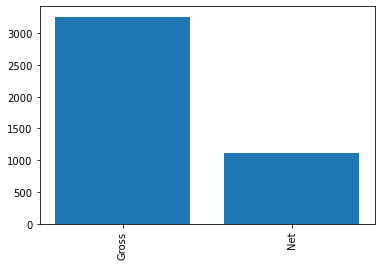

Total Gross: 3260.0
Total Net: 1110.0


In [425]:
Net_Gross273 = {
    'Gross' : df2['Gross'].sum(),
    'Net' : df2['Net'].sum()
}


data = Net_Gross273
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df2['Gross'].sum()
Total_net = df2['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))

In [426]:
df3 = pd.read_excel (r'374.xlsx',header=[3])
df3.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df3.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty'}, inplace=True)
df3 = df3[df3.Customer != "TRANSFERS TO #372 J'VILLE"]
df3 = df3[df3.Customer != "TRANSFERS TO #374 SEYMOUR"]
df3 = df3[df3.Customer != "TRANSFERS TO #373 E-TOWN"]
df3 = df3[df3.Customer != "TRANSFERS TO #375 S'VILLE"]
df3 = df3[df3.Customer != "*** STORE TRANSFERS ***"]
df3 = df3[df3.Customer != "Beginning Balance"]
df3 = df3[df3.Customer != 'Net Activity']
df3 = df3[df3.Customer != 'Ending Balance']
df3 = df3[df3.Customer != 'VOID']
df3 = df3.dropna(how="all")

Gross = df3.Qty * df3.Price
df3['Gross'] = Gross.where(df3.Price == 'Qty', other=Gross)

Net = df3.Qty * df3.Cost 
df3['Net'] = Net.where(df3.Cost == 'Qty', other=Net)

Net = df3.Gross - df3.Net 
df3['Net'] = Net.where(df3.Gross == "Net", other=Net)

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [427]:
df3.head()

,Transaction Date,Customer,Qty,Price,Cost,Gross,Net
2,2022-09-21,NORTH VERNON BEVERAGE,3.0,75.0,50.0,225.0,75.0
10,2022-05-26,"R W TRANSPORT, INC",1.0,75.0,50.0,75.0,25.0
12,2022-05-12,"R W TRANSPORT, INC",4.0,75.0,50.0,300.0,100.0
15,2022-04-30,NEW WAY TRANSPORTATION,2.0,65.0,50.0,130.0,30.0
16,2022-04-20,FOX FARMS,4.0,75.0,50.0,300.0,100.0


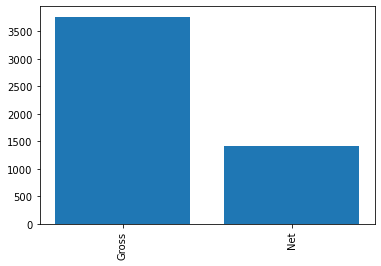

Total Gross: 3765.0
Total Net: 1415.0


In [428]:
Net_Gross274 = {
    'Gross' : df3['Gross'].sum(),
    'Net' : df3['Net'].sum()
}


data = Net_Gross274
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df3['Gross'].sum()
Total_net = df3['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))

In [429]:
df4 = pd.read_excel (r'375.xlsx',header=[3])
df4.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df4.rename(columns={'Customer/Vendor Name' : 'Customer', 'Non-Inventory Quantity': 'Qty'}, inplace=True)
df4 = df4[df4.Customer != "TRANSFERS TO #372 J'VILLE"]
df4 = df4[df4.Customer != "TRANSFERS TO #374 SEYMOUR"]
df4 = df4[df4.Customer != "TRANSFERS TO #373 E-TOWN"]
df4 = df4[df4.Customer != "TRANSFERS TO #375 S'VILLE"]
df4 = df4[df4.Customer != "*** STORE TRANSFERS ***"]
df4 = df4[df4.Customer != "Beginning Balance"]
df4 = df4[df4.Customer != 'Net Activity']
df4 = df4[df4.Customer != 'Ending Balance']
df4 = df4[df4.Customer != 'VOID']
df4 = df4.dropna(how="all")

Gross = df4.Qty * df4.Price
df4['Gross'] = Gross.where(df4.Price == 'Qty', other=Gross)

Net = df4.Qty * df4.Cost 
df4['Net'] = Net.where(df4.Cost == 'Qty', other=Net)

Net = df4.Gross - df4.Net 
df4['Net'] = Net.where(df4.Gross == "Net", other=Net)


/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [430]:
df4.head()

,Transaction Date,Customer,Qty,Price,Cost,Gross,Net
0,2022-11-17,HARROD TRANSPORT,4.0,75.0,50.0,300.0,100.0


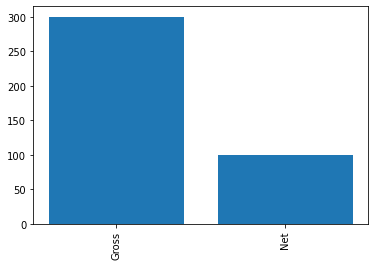

Total Gross: 300.0
Total Net: 100.0


In [431]:
Net_Gross275 = {
    'Gross' : df4['Gross'].sum(),
    'Net' : df4['Net'].sum()
}


data = Net_Gross275
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df4['Gross'].sum()
Total_net = df4['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))

In [432]:

df5 = pd.read_excel (r'376.xlsx',header=[3])

df5.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)

df5.rename(columns={'Customer/Vendor Name' : 'Customer', 'Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)

df5 = df5[df5.Customer != "TRANSFERS TO #372 J'VILLE"]
df5 = df5[df5.Customer != "TRANSFERS TO #374 SEYMOUR"]
df5 = df5[df5.Customer != "TRANSFERS TO #373 E-TOWN"]
df5 = df5[df5.Customer != "TRANSFERS TO #375 S'VILLE"]
df5 = df5[df5.Customer != "*** STORE TRANSFERS ***"]
df5 = df5[df5.Customer != "Beginning Balance"]
df5 = df5[df5.Customer != 'Net Activity']
df5 = df5[df5.Customer != 'Ending Balance']
df5 = df5[df5.Customer != 'VOID']
df5 = df5.dropna(how="all")

Gross = df5.Qty * df5.Price
df5['Gross'] = Gross.where(df5.Price == 'Qty', other=Gross)

Net = df5.Qty * df5.Cost 
df5['Net'] = Net.where(df5.Cost == 'Qty', other=Net)

Net = df5.Gross - df5.Net 
df5['Net'] = Net.where(df5.Gross == "Net", other=Net)

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [433]:
df5.head(5)

,Date,Customer,Qty,Price,Cost,Gross,Net
3,2022-11-16,PENSKE #5471 - JEFFVILLE,2.0,75.0,50.0,150.0,50.0
4,2022-11-16,PENSKE #0456 - LOUISVILLE,3.0,75.0,50.0,225.0,75.0
5,2022-11-16,PENSKE #6409-10 - DERBY CITY,1.0,75.0,50.0,75.0,25.0
6,2022-11-16,"WASTE MANAGEMENT,INC",6.0,75.0,50.0,450.0,150.0
7,2022-11-16,PENSKE #5471 - JEFFVILLE,1.0,75.0,50.0,75.0,25.0


In [434]:
# df5['Date'] = pd.to_datetime(df5['Date'])
# df5 = df5['Date'].dt.year
# df5.head()

In [435]:
# first_date = datetime.strptime('2022-11-16', '%Y-%m-%d')
# print(first_date)


In [436]:
# gross_grouped_by_date = df5.groupby('Date').agg(sum_gross = ('Gross', 'sum'))
# print(gross_grouped_by_date )

In [437]:
df5['Date'] = pd.to_datetime(df5['Date'], format='%y%m%d')
df5 = df5.groupby(df5['Date'].dt.to_period('m')).sum()
print(df5)

           Qty    Price    Cost    Gross      Net
Date                                             
2021-08   60.0   957.00   650.0  4351.50  1351.50
2021-09   96.0  1550.00  1050.0  6835.00  2035.00
2021-10   64.0  1215.50   800.0  4828.00  1628.00
2021-11   73.0  1461.50  1000.0  5258.50  1608.50
2021-12   64.0  1181.50   800.0  4618.00  1418.00
2022-01   90.0  1037.00   700.0  6515.50  2015.50
2022-02   56.0  1336.50   900.0  4092.00  1292.00
2022-03   78.0  1480.00  1000.0  5690.00  1790.00
2022-04   71.0  1700.50  1150.0  5220.00  1670.00
2022-05   37.0  1195.00   800.0  2765.00   915.00
2022-06   74.0  1187.00   800.0  5468.50  1768.50
2022-07   65.0   896.50   650.0  4211.00   961.00
2022-08   77.0  1482.00  1000.0  5667.00  1817.00
2022-09  100.0  1441.00  1000.0  6610.00  1610.00
2022-10   96.0  1961.74  1350.0  6682.49  1882.49
2022-11   63.0  1219.37   800.0  4837.87  1687.87
83650.36


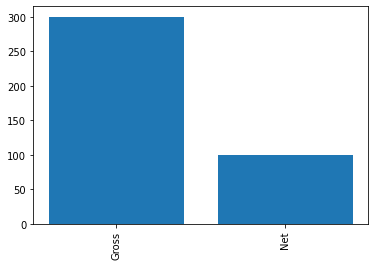

Total Gross: 83650.36
Total Net: 25450.36


In [438]:
Net_Gross276 = {
    'Gross' : df5['Gross'].sum(),
    'Net' : df5['Net'].sum()
}


data = Net_Gross275
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df5['Gross'].sum()
Total_net = df5['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))

In [439]:
frames = [df1, df2, df3, df4, df5]

df99 = pd.concat(frames)
df99.head()

print(df99['Net'].sum())
print(df99['Gross'].sum())

32920.36
105720.36


In [440]:
Net_Gross = {
    '370_Gross' : df0['Gross'].sum(),
    '370_net' : df0['Net'].sum(),
    '372_Gross' : df1['Gross'].sum(),
    '372_net' : df1['Net'].sum(),
    '373_Gross' : df2['Gross'].sum(),
    '373_net' : df2['Net'].sum(),
    '374_Gross' : df3['Gross'].sum(),
    '374_net' : df3['Net'].sum(),
    '375_Gross' : df4['Gross'].sum(),
    '375_net' : df4['Net'].sum(),
    '376_Gross' : df5['Gross'].sum(),
    '376_net' : df5['Net'].sum(),
}

# print(Net_Gross)

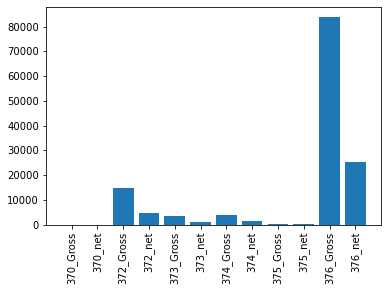

Total Gross: 105720.36
Total Net: 32920.36


In [441]:
data = Net_Gross
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df0['Gross'].sum() + df1['Gross'].sum() + df2['Gross'].sum() + df3['Gross'].sum() + df4['Gross'].sum() + df5['Gross'].sum()
Total_net = df0['Net'].sum() + df1['Net'].sum() + df2['Net'].sum() + df3['Net'].sum() + df4['Net'].sum() + df5['Net'].sum()

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))


In [442]:
by_cust =(df5['Customer']).value_counts().sort_index()
df5_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
# df5_customer.sort_values(by=['counts'], reverse=True)
df5_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df5_customer

KeyError: 'Customer'

In [ ]:
# list_YM = [i.split(" ")[0][:-2] for i in  list(df5['Transaction Date'])]
# list_Year = [i.split(" ")[0][0:4] for i in  list(df5['Transaction Date'])]
# list_Month = [i.split(" ")[0][5:7] for i in  list(df5['Transaction Date'])]

# df5['YM'] = list_YM
# df5['Year'] = list_Year
# df5['Month'] = list_Month

# df5.head(5)

In [ ]:
#  # convert to date
# df5 = pd.to_datetime(df5['Date'])
 
# # verify datatype
# print(df5)

In [ ]:
# print(df5.groupby([df5['Date'].dt.year.rename('y'), df5['Date'].dt.month.rename('m')]).sum())

In [ ]:
# df5.groupby(df5['Date'].dt.to_period('m')).sum()
# print(df5)

In [ ]:
# df5.assign(yr = df5['Date'].dt.year, mnth = df5['Date'].dt.month).groupby(['yr', 'mnth']).sum()
# df5


In [ ]:
# df5.assign(yr = df5['Date'].dt.year, mnth = df5['Date'].dt.month).groupby(['yr', 'mnth']).sum()

In [ ]:
per = df5.Date.dt.to_period("M")
g = df5.groupby(per)
df51 = g.sum() 
df51.drop(columns=['Qty', 'Price', 'Cost' ], inplace=True)
df51.head(30)
# df51.columns


,Gross,Net
Date,,
2021-08,4351.50,1351.50
2021-09,6835.00,2035.00
2021-10,4828.00,1628.00
2021-11,5258.50,1608.50
2021-12,4618.00,1418.00
2022-01,6515.50,2015.50
2022-02,4092.00,1292.00
2022-03,5690.00,1790.00
2022-04,5220.00,1670.00


In [ ]:
df51.insert(0, "Date", True)
# df51.set_axis(["Date", "Gross", "Net"], axis=1, inplace=True)
df51.head()

,Date,Gross,Net
Date,,,
2021-08,True,4351.5,1351.5
2021-09,True,6835.0,2035.0
2021-10,True,4828.0,1628.0
2021-11,True,5258.5,1608.5
2021-12,True,4618.0,1418.0


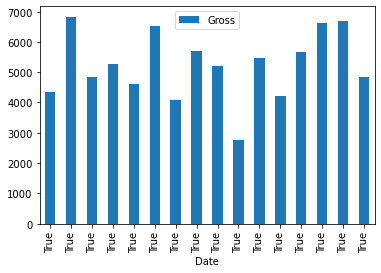

In [ ]:
df51.plot(x='Date', y='Gross', kind = 'bar')
plt.show()

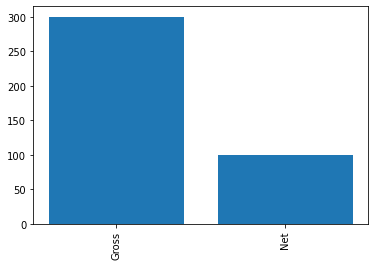

Total Gross: 83650.36
Total Net: 25450.36


In [ ]:
Net_Gross276 = {
    'Gross' : df5['Gross'],
    'Net' : df5['Net']
}


data = Net_Gross275
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df5['Gross'].sum()
Total_net = df5['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))

In [ ]:
# df5['Date'].dtypes